In [2]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon, Point, shape
from sklearn.model_selection import train_test_split


In [65]:
city = 'ssa'
grid = gpd.read_file('../../QGIS/aglomerados_subnormais/deprived_areas_shapefiles/{}/deprived_areas_{}.shp'.format(city, city))
grid

,fid,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,id,left,top,right,bottom,row_index,col_index,intersect_,area_total,proportion,vigreen_co,vigreen_su,vigreen_me,geometry
0,1.0,2927408,Salvador,BA,693.442,131547.0,574310.088541,8.573209e+06,574410.088541,8.573109e+06,191.0,417.0,NaN,10006.64,NaN,806.0,-44.588709,-0.055321,"POLYGON ((-38.3141 -12.90555, -38.31409 -12.90..."
1,1.0,2927408,Salvador,BA,693.442,131546.0,574310.088541,8.573309e+06,574410.088541,8.573209e+06,190.0,417.0,NaN,6901.24,NaN,563.0,-27.158279,-0.048239,"POLYGON ((-38.31473 -12.90496, -38.3141 -12.90..."
2,1.0,2927408,Salvador,BA,693.442,131549.0,574310.088541,8.573009e+06,574410.088541,8.572909e+06,193.0,417.0,NaN,10006.64,NaN,784.0,-62.539299,-0.079770,"POLYGON ((-38.31409 -12.90736, -38.31409 -12.9..."
3,1.0,2927408,Salvador,BA,693.442,131548.0,574310.088541,8.573109e+06,574410.088541,8.573009e+06,192.0,417.0,NaN,10006.64,NaN,784.0,-31.983978,-0.040796,"POLYGON ((-38.31409 -12.90646, -38.31409 -12.9..."
4,1.0,2927408,Salvador,BA,693.442,131551.0,574310.088541,8.572809e+06,574410.088541,8.572709e+06,195.0,417.0,NaN,10006.64,NaN,812.0,68.696008,0.084601,"POLYGON ((-38.31409 -12.90917, -38.31408 -12.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21218,1.0,2927408,Salvador,BA,693.442,48069.0,547810.088541,8.573509e+06,547910.088541,8.573409e+06,188.0,152.0,NaN,10007.44,NaN,812.0,42.498118,0.052338,"POLYGON ((-38.55837 -12.90337, -38.55837 -12.9..."
21219,1.0,2927408,Salvador,BA,693.442,48068.0,547810.088541,8.573609e+06,547910.088541,8.573509e+06,187.0,152.0,NaN,10007.44,NaN,812.0,20.854284,0.025683,"POLYGON ((-38.55837 -12.90246, -38.55837 -12.9..."
21220,1.0,2927408,Salvador,BA,693.442,47753.0,547710.088541,8.573609e+06,547810.088541,8.573509e+06,187.0,151.0,NaN,10007.44,NaN,791.0,22.846010,0.028882,"POLYGON ((-38.55929 -12.90246, -38.55929 -12.9..."
21221,1.0,2927408,Salvador,BA,693.442,47752.0,547710.088541,8.573709e+06,547810.088541,8.573609e+06,186.0,151.0,NaN,10007.44,NaN,812.0,70.984327,0.087419,"POLYGON ((-38.55929 -12.90156, -38.55929 -12.9..."


<Axes: >

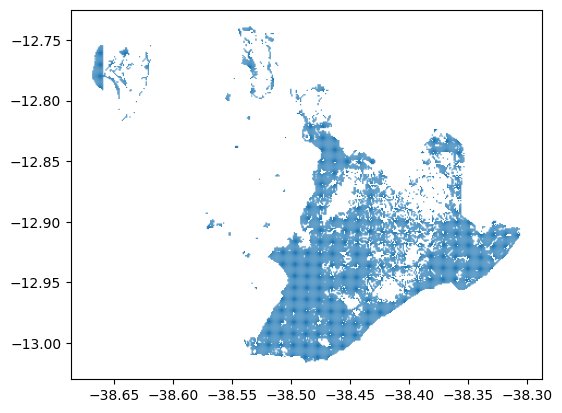

In [66]:
# remove edges
grid = grid[grid['area_total'] > 9999]
grid.plot()

In [67]:
non_deprived = grid[pd.isnull(grid['proportion'])]
deprived_sample_data = grid[grid['proportion'] > 0.9]

In [68]:
deprived_sample_data

,fid,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,id,left,top,right,bottom,row_index,col_index,intersect_,area_total,proportion,vigreen_co,vigreen_su,vigreen_me,geometry
210,1.0,2927408,Salvador,BA,693.442,90573.0,561310.088541,8.575609e+06,561410.088541,8.575509e+06,167.0,287.0,10007.07,10007.07,1.00,784.0,68.225217,0.087022,"POLYGON ((-38.43397 -12.88414, -38.43397 -12.8..."
214,1.0,2927408,Salvador,BA,693.442,90561.0,561310.088541,8.576809e+06,561410.088541,8.576709e+06,155.0,287.0,10007.07,10007.07,1.00,794.0,56.987693,0.071773,"POLYGON ((-38.434 -12.87329, -38.43399 -12.874..."
216,1.0,2927408,Salvador,BA,693.442,90562.0,561310.088541,8.576709e+06,561410.088541,8.576609e+06,156.0,287.0,10007.07,10007.07,1.00,812.0,-5.619453,-0.006921,"POLYGON ((-38.43399 -12.87419, -38.43399 -12.8..."
221,1.0,2927408,Salvador,BA,693.442,90617.0,561310.088541,8.571209e+06,561410.088541,8.571109e+06,211.0,287.0,9284.62,10007.07,0.93,812.0,38.003305,0.046802,"POLYGON ((-38.43388 -12.92392, -38.43388 -12.9..."
223,1.0,2927408,Salvador,BA,693.442,90619.0,561310.088541,8.571009e+06,561410.088541,8.570909e+06,213.0,287.0,10007.07,10007.07,1.00,808.0,-7.662409,-0.009483,"POLYGON ((-38.43388 -12.92573, -38.43388 -12.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20722,1.0,2927408,Salvador,BA,693.442,65496.0,553310.088541,8.563309e+06,553410.088541,8.563209e+06,290.0,207.0,10007.30,10007.30,1.00,812.0,-6.848431,-0.008434,"POLYGON ((-38.50749 -12.99551, -38.50749 -12.9..."
20734,1.0,2927408,Salvador,BA,693.442,65495.0,553310.088541,8.563409e+06,553410.088541,8.563309e+06,289.0,207.0,10007.30,10007.30,1.00,828.0,-0.682008,-0.000824,"POLYGON ((-38.50749 -12.9946, -38.50749 -12.99..."
20735,1.0,2927408,Salvador,BA,693.442,65494.0,553310.088541,8.563509e+06,553410.088541,8.563409e+06,288.0,207.0,9993.69,10007.30,1.00,825.0,48.711879,0.059045,"POLYGON ((-38.50749 -12.9937, -38.50749 -12.99..."
20817,1.0,2927408,Salvador,BA,693.442,65181.0,553210.088541,8.563309e+06,553310.088541,8.563209e+06,290.0,206.0,10007.30,10007.30,1.00,812.0,-7.770264,-0.009569,"POLYGON ((-38.50841 -12.99551, -38.50841 -12.9..."


In [69]:
# non_deprived_sampled_data, _ = train_test_split(non_deprived, train_size=len(deprived_sample_data), random_state=42)
# non_deprived_sampled_data

non_deprived_sampled_data, _ = train_test_split(non_deprived, train_size=1500, random_state=42)
deprived_sampled_data, _ = train_test_split(deprived_sample_data, train_size=1500, random_state=42)

In [70]:
deprived_sampled_data['class'] = 1
non_deprived_sampled_data['class'] = 0
sampled_data = pd.concat([deprived_sampled_data, non_deprived_sampled_data])
sampled_data

,fid,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,id,left,top,right,bottom,row_index,col_index,intersect_,area_total,proportion,vigreen_co,vigreen_su,vigreen_me,geometry,class
4682,1.0,2927408,Salvador,BA,693.442,87777.0,560410.088541,8.571709e+06,560510.088541,8.571609e+06,206.0,278.0,10007.10,10007.10,1.00,812.0,13.519332,0.016649,"POLYGON ((-38.44219 -12.91942, -38.44219 -12.9...",1
5444,1.0,2927408,Salvador,BA,693.442,89985.0,561110.088541,8.571409e+06,561210.088541,8.571309e+06,209.0,285.0,10007.08,10007.08,1.00,812.0,62.814589,0.077358,"POLYGON ((-38.43573 -12.92212, -38.43573 -12.9...",1
18117,1.0,2927408,Salvador,BA,693.442,100334.0,564410.088541,8.576009e+06,564510.088541,8.575909e+06,163.0,318.0,10006.98,10006.98,1.00,784.0,10.978956,0.014004,"POLYGON ((-38.40541 -12.88046, -38.40541 -12.8...",1
236,1.0,2927408,Salvador,BA,693.442,90607.0,561310.088541,8.572209e+06,561410.088541,8.572109e+06,201.0,287.0,10007.07,10007.07,1.00,784.0,16.658712,0.021248,"POLYGON ((-38.4339 -12.91488, -38.4339 -12.915...",1
14537,1.0,2927408,Salvador,BA,693.442,116684.0,569610.088541,8.579009e+06,569710.088541,8.578909e+06,133.0,370.0,9551.34,10006.80,0.95,808.0,0.586055,0.000725,"POLYGON ((-38.35755 -12.85322, -38.35755 -12.8...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10370,1.0,2927408,Salvador,BA,693.442,66109.0,553510.088541,8.565009e+06,553610.088541,8.564909e+06,273.0,209.0,NaN,10007.29,NaN,812.0,53.425551,0.065795,"POLYGON ((-38.50568 -12.98013, -38.50567 -12.9...",0
20994,1.0,2927408,Salvador,BA,693.442,55341.0,550110.088541,8.570809e+06,550210.088541,8.570709e+06,215.0,175.0,NaN,10007.38,NaN,784.0,-22.059983,-0.028138,"POLYGON ((-38.53712 -12.92774, -38.53712 -12.9...",0
10638,1.0,2927408,Salvador,BA,693.442,67325.0,553910.088541,8.569409e+06,554010.088541,8.569309e+06,229.0,213.0,NaN,10007.28,NaN,809.0,20.444489,0.025271,"POLYGON ((-38.50207 -12.94034, -38.50206 -12.9...",0
1784,1.0,2927408,Salvador,BA,693.442,95624.0,562910.088541,8.574509e+06,563010.088541,8.574409e+06,178.0,303.0,NaN,10007.02,NaN,808.0,34.505629,0.042705,"POLYGON ((-38.4192 -12.89405, -38.4192 -12.894...",0


In [71]:
sampled_data.to_file('../../QGIS/aglomerados_subnormais/final_shapefiles/{}/shapefile_sampled_data.shp'.format(city))